## Vehicle Damage Classification- Convolutional Neural Network

In [101]:
# Import Relevant Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, confusion_matrix,
classification_report, ConfusionMatrixDisplay )


# Neural network libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MSE
import tensorflow.keras as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization, AveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

The goal of this task is to develop a Convolutional Neural Network (CNN) model capable 
of classifying different types of vehicle damages based on images. The categories of vehicle 
damage include crack, scratch, tire flat, dent, glass shatter and lamp broken. The model should 
be trained to automatically assess the legitimacy of vehicle damage claims, which is essential 
for insurance verification. 

Load required CSV file and merge rows with corresponding image

In [26]:
# Load the CSV file for training data
vehicle_data = pd.read_csv('2/train/train/train.csv')
vehicle_data['label']=vehicle_data['label'].astype(str) # Convert label to string

# Define the image directory (same for both train and validation)
image_path = '2/train/train/images'

# Split to train & test set
train_data, val_data = train_test_split(vehicle_data, test_size=0.2, stratify=vehicle_data['label'], random_state=42)

train_datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.1, validation_split=0.2,  
                     vertical_flip=False, shear_range=0.1,width_shift_range=0.1, height_shift_range=0.1, rescale=1./255, horizontal_flip=True) #TEMMY


# Load training images from the path
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_path,
    x_col='filename',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

# Load validation images from the same path
val_generator = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    dataframe=val_data,
    directory=image_path,
    x_col='filename',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    shuffle=False,
    class_mode='categorical')

Found 5760 validated image filenames belonging to 6 classes.
Found 1440 validated image filenames belonging to 6 classes.


In [20]:
# View labels and label count
print(train_set.classes[:20])  # first 20 labels
print(np.bincount(train_set.classes))  # count per class

[1, 3, 1, 4, 3, 4, 1, 1, 3, 1, 0, 1, 4, 0, 4, 4, 3, 5, 0, 4]
[ 110 1503  342 1330  758  565]


 Convoluted model with 3 convolutional layers & Poolings, no dropout, using learning rate of 0.001

In [31]:
# Note image height and width
width_npix= 128
height_npix= 128

# Create an instance sequential 
model = Sequential()

# 1st Conv & Pool
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width_npix, height_npix, 3)))
model.add(MaxPooling2D((2, 2)))

# 2nd Conv & Pool
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 3rd Conv & Pooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten, Dense & Dropout
model.add(Flatten())
model.add(Dense(64, activation='relu'))


# Add output layer
model.add(Dense(6, activation = 'softmax'))


Optimizer= Adam(learning_rate=0.001) # Define optimizer and choose learning rate.
model.compile(
    optimizer=Optimizer,
    loss='categorical_crossentropy',   # since using one-hot encoding
    metrics=['accuracy']
)

# Include early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience = 4)

# Fit model
history = model.fit(train_generator, epochs = 60, validation_data = val_generator, callbacks=[early_stopping]) 

Epoch 1/60
180/180 [==============================] - 184s 1s/step - loss: 1.5028 - accuracy: 0.3413 - val_loss: 1.3532 - val_accuracy: 0.4090
Epoch 2/60
180/180 [==============================] - 200s 1s/step - loss: 1.2833 - accuracy: 0.4582 - val_loss: 1.2294 - val_accuracy: 0.4778
Epoch 3/60
180/180 [==============================] - 205s 1s/step - loss: 1.1708 - accuracy: 0.5104 - val_loss: 1.0787 - val_accuracy: 0.5382
Epoch 4/60
180/180 [==============================] - 180s 999ms/step - loss: 1.1103 - accuracy: 0.5427 - val_loss: 0.9940 - val_accuracy: 0.5903
Epoch 5/60
180/180 [==============================] - 175s 969ms/step - loss: 1.0597 - accuracy: 0.5594 - val_loss: 1.0721 - val_accuracy: 0.5556
Epoch 6/60
180/180 [==============================] - 179s 993ms/step - loss: 1.0176 - accuracy: 0.5792 - val_loss: 0.9656 - val_accuracy: 0.5896
Epoch 7/60
180/180 [==============================] - 176s 974ms/step - loss: 0.9997 - accuracy: 0.5819 - val_loss: 0.9612 - val_accu

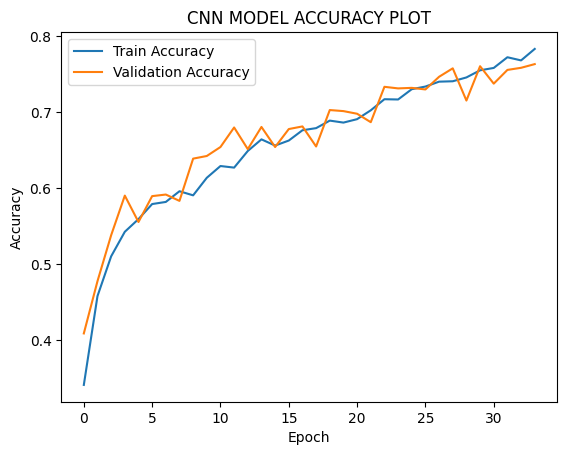

In [131]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN MODEL ACCURACY PLOT')
plt.show()

Main Model Used
1. Convoluted model with 3 convolutional layers & Poolings, a 30% dropout, using learning rate of 0.001 **

In [57]:
# Create an instance of Sequential
model_LR0001_Drop30_ = Sequential()

# 1st Conv & Pool
model_LR0001_Drop30_.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width_npix, height_npix, 3)))
model_LR0001_Drop30_.add(MaxPooling2D((2, 2)))

# 2nd Conv & Pool
model_LR0001_Drop30_.add(Conv2D(64, (3, 3), activation='relu'))
model_LR0001_Drop30_.add(MaxPooling2D((2, 2)))

# 3rd Conv & Pooling
model_LR0001_Drop30_.add(Conv2D(128, (3, 3), activation='relu'))
model_LR0001_Drop30_.add(MaxPooling2D((2, 2)))

# Flatten, Dense & Dropout
model_LR0001_Drop30_.add(Flatten())
model_LR0001_Drop30_.add(Dense(64, activation='relu'))
model_LR0001_Drop30_.add(Dropout(0.3))


# Add output layer
model_LR0001_Drop30_.add(Dense(6, activation = 'softmax'))

Optimizer= Adam(learning_rate=0.001) # Define optimizer and choose learning rate.
model_LR0001_Drop30_.compile(
    optimizer=Optimizer,
    loss='categorical_crossentropy',   # since using one-hot encoding
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience = 4) # Define early stopping

# Fit model
history_LR0001_Drop30_ = model_LR0001_Drop30_.fit(train_generator, epochs =60, validation_data = val_generator, callbacks=[early_stopping]) 

Epoch 1/60
180/180 [==============================] - 203s 1s/step - loss: 1.5045 - accuracy: 0.3431 - val_loss: 1.2535 - val_accuracy: 0.4722
Epoch 2/60
180/180 [==============================] - 214s 1s/step - loss: 1.3027 - accuracy: 0.4542 - val_loss: 1.2054 - val_accuracy: 0.4778
Epoch 3/60
180/180 [==============================] - 209s 1s/step - loss: 1.2065 - accuracy: 0.4847 - val_loss: 1.0753 - val_accuracy: 0.5424
Epoch 4/60
180/180 [==============================] - 187s 1s/step - loss: 1.1632 - accuracy: 0.5168 - val_loss: 1.0237 - val_accuracy: 0.5486
Epoch 5/60
180/180 [==============================] - 182s 1s/step - loss: 1.1441 - accuracy: 0.5252 - val_loss: 0.9917 - val_accuracy: 0.5889
Epoch 6/60
180/180 [==============================] - 188s 1s/step - loss: 1.0733 - accuracy: 0.5422 - val_loss: 0.9756 - val_accuracy: 0.5750
Epoch 7/60
180/180 [==============================] - 176s 973ms/step - loss: 1.0657 - accuracy: 0.5562 - val_loss: 0.9714 - val_accuracy: 0.5

In [117]:
y_probs = model_LR0001_Drop30_.predict(val_generator)

45/45 [==============================] - 35s 773ms/step


In [118]:
loss, accuracy = model_LR0001_Drop30_.evaluate(val_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

45/45 [==============================] - 16s 359ms/step - loss: 0.5330 - accuracy: 0.7979
Test Loss: 0.5330
Test Accuracy: 0.7979


In [119]:
y_pred = np.argmax(y_probs, axis=1)  # predicted classes
y_true = val_generator.classes             # true labels from generator

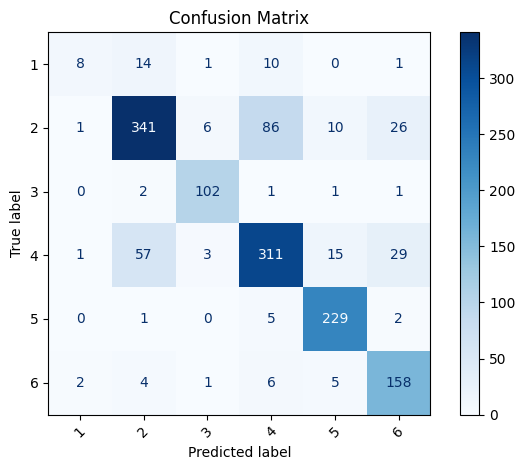

In [120]:
cm = confusion_matrix(y_true, y_pred) # Obtain confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', xticks_rotation=45) # Plot matrix
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [125]:
# Evaluate
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

Accuracy: 0.7979166666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.24      0.35        34
           1       0.81      0.73      0.77       470
           2       0.90      0.95      0.93       107
           3       0.74      0.75      0.74       416
           4       0.88      0.97      0.92       237
           5       0.73      0.90      0.80       176

    accuracy                           0.80      1440
   macro avg       0.79      0.75      0.75      1440
weighted avg       0.80      0.80      0.79      1440



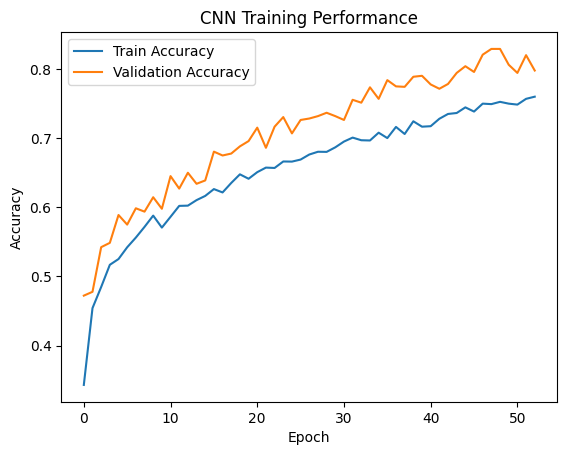

In [122]:
plt.plot(history_LR0001_Drop30_.history['accuracy'], label='Train Accuracy')
plt.plot(history_LR0001_Drop30_.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training Performance')
plt.show()

convoluted model with 3 convolutional layers & Poolings, a 50% dropout, using learning rate of 0.001 **

In [46]:
# Create an instance of sequential
model_LR0001_Drop50 = Sequential()

# 1st Conv & Pool
model_LR0001_Drop50.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width_npix, height_npix, 3)))
model_LR0001_Drop50.add(MaxPooling2D((2, 2)))

# 2nd Conv & Pool
model_LR0001_Drop50.add(Conv2D(64, (3, 3), activation='relu'))
model_LR0001_Drop50.add(MaxPooling2D((2, 2)))

# 3rd Conv & Pooling
model_LR0001_Drop50.add(Conv2D(128, (3, 3), activation='relu'))
model_LR0001_Drop50.add(MaxPooling2D((2, 2)))

# Flatten, Dense & Dropout
model_LR0001_Drop50.add(Flatten())
model_LR0001_Drop50.add(Dense(64, activation='relu'))
model_LR0001_Drop50.add(Dropout(0.5))


# Add output layer
model_LR0001_Drop50.add(Dense(6, activation = 'softmax'))

Optimizer= Adam(learning_rate=0.001) # Define optimizer and choose learning rate.
model_LR0001_Drop50.compile(
    optimizer=Optimizer,
    loss='categorical_crossentropy',   # since using one-hot encoding
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience = 4) # Define early stopping

# Fit model
history_LR0001_Drop50 = model_LR0001_Drop50.fit(train_generator, epochs =60, validation_data = val_generator, callbacks=[early_stopping]) 

Epoch 1/60
180/180 [==============================] - 263s 1s/step - loss: 1.5484 - accuracy: 0.3266 - val_loss: 1.3716 - val_accuracy: 0.3979
Epoch 2/60
180/180 [==============================] - 199s 1s/step - loss: 1.3964 - accuracy: 0.3967 - val_loss: 1.3051 - val_accuracy: 0.4521
Epoch 3/60
180/180 [==============================] - 207s 1s/step - loss: 1.3163 - accuracy: 0.4377 - val_loss: 1.1604 - val_accuracy: 0.5069
Epoch 4/60
180/180 [==============================] - 192s 1s/step - loss: 1.2428 - accuracy: 0.4641 - val_loss: 1.1824 - val_accuracy: 0.4868
Epoch 5/60
180/180 [==============================] - 173s 956ms/step - loss: 1.2238 - accuracy: 0.4707 - val_loss: 1.1590 - val_accuracy: 0.5319
Epoch 6/60
180/180 [==============================] - 168s 935ms/step - loss: 1.2048 - accuracy: 0.4908 - val_loss: 1.0405 - val_accuracy: 0.5549
Epoch 7/60
180/180 [==============================] - 167s 926ms/step - loss: 1.1686 - accuracy: 0.4988 - val_loss: 1.0648 - val_accurac

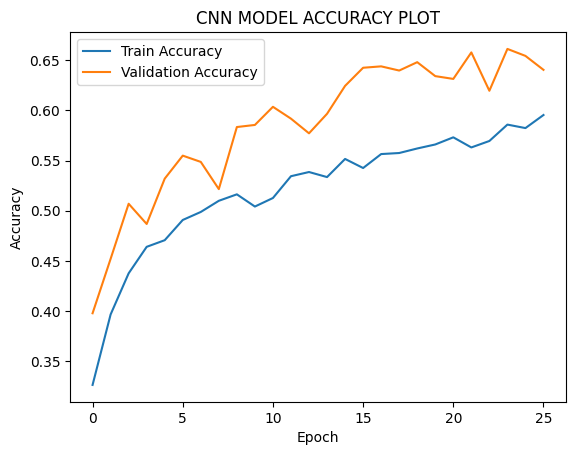

In [132]:
# Plot accuracy
plt.plot(history_LR0001_Drop50.history['accuracy'], label='Train Accuracy')
plt.plot(history_LR0001_Drop50.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN MODEL ACCURACY PLOT')
plt.show()

CNN model convoluted model with 3 convolutional layers & Poolings, a 30% dropout, using Learning Rate of 0.01 **

In [65]:
# Create an instance of sequential
model_LR001_Drop30 = Sequential()

# 1st Conv & Pool
model_LR001_Drop30.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width_npix, height_npix, 3)))
model_LR001_Drop30.add(MaxPooling2D((2, 2)))

# 2nd Conv & Pool
model_LR001_Drop30.add(Conv2D(64, (3, 3), activation='relu'))
model_LR001_Drop30.add(MaxPooling2D((2, 2)))

# 3rd Conv & Pooling
model_LR001_Drop30.add(Conv2D(128, (3, 3), activation='relu'))
model_LR001_Drop30.add(MaxPooling2D((2, 2)))

# Flatten, Dense & Dropout
model_LR001_Drop30.add(Flatten())
model_LR001_Drop30.add(Dense(64, activation='relu'))
model_LR001_Drop30.add(Dropout(0.3))


# Add output layer
model_LR001_Drop30.add(Dense(6, activation = 'softmax'))

Optimizer= Adam(learning_rate=0.01) # Define optimizer and choose learning rate.
model_LR001_Drop30.compile(
    optimizer=Optimizer,
    loss='categorical_crossentropy',   # since using one-hot encoding
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience = 4) # Define early stopping

# Fit model
history_LR001_Drop30 = model_LR001_Drop30.fit(train_generator, epochs =60, validation_data = val_generator, callbacks=[early_stopping]) 

Epoch 1/60
180/180 [==============================] - 172s 945ms/step - loss: 2.0881 - accuracy: 0.3181 - val_loss: 1.5642 - val_accuracy: 0.2889
Epoch 2/60
180/180 [==============================] - 166s 921ms/step - loss: 1.5664 - accuracy: 0.3219 - val_loss: 1.5619 - val_accuracy: 0.3264
Epoch 3/60
180/180 [==============================] - 166s 922ms/step - loss: 1.5640 - accuracy: 0.3227 - val_loss: 1.5602 - val_accuracy: 0.3264
Epoch 4/60
180/180 [==============================] - 165s 916ms/step - loss: 1.5660 - accuracy: 0.3231 - val_loss: 1.5602 - val_accuracy: 0.3264
Epoch 5/60
180/180 [==============================] - 168s 932ms/step - loss: 1.5640 - accuracy: 0.3257 - val_loss: 1.5602 - val_accuracy: 0.3264
Epoch 6/60
180/180 [==============================] - 196s 1s/step - loss: 1.5629 - accuracy: 0.3184 - val_loss: 1.5603 - val_accuracy: 0.3264
Epoch 7/60
180/180 [==============================] - 175s 971ms/step - loss: 1.5635 - accuracy: 0.3238 - val_loss: 1.5597 - va

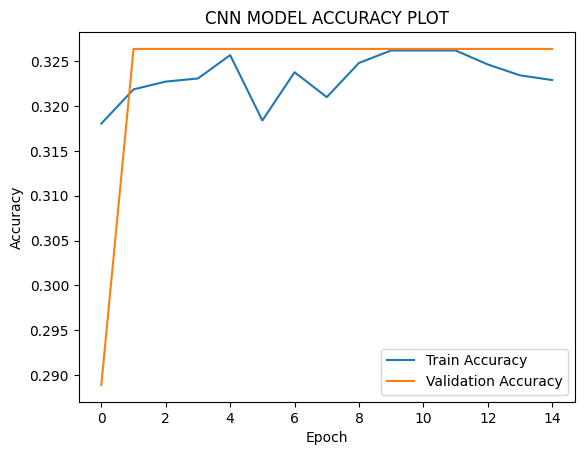

In [133]:
# Plot accuracy
plt.plot(history_LR001_Drop30.history['accuracy'], label='Train Accuracy')
plt.plot(history_LR001_Drop30.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN MODEL ACCURACY PLOT')
plt.show()

Convoluted model with 3 convolutional layers & Poolings, 30% dropout, using learning rate of 0.001, kernel size changed to 5x5 **

In [59]:
# Create an instance of sequential
model_k5 = Sequential()

# 1st Conv & Pool
model_k5.add(Conv2D(32, (5, 5), activation='relu', input_shape=(width_npix, height_npix, 3)))
model_k5.add(MaxPooling2D((2, 2)))

# 2nd Conv & Pool
model_k5.add(Conv2D(64, (5, 5), activation='relu'))
model_k5.add(MaxPooling2D((2, 2)))

# 3rd Conv & Pooling
model_k5.add(Conv2D(128, (5, 5), activation='relu'))
model_k5.add(MaxPooling2D((2, 2)))


# Flatten, Dense & Dropout
model_k5.add(Flatten())
model_k5.add(Dense(64, activation='relu'))
model_k5.add(Dropout(0.3))


# Add output layer
model_k5.add(Dense(6, activation = 'softmax'))

Optimizer= Adam(learning_rate=0.001) # Define optimizer and choose learning rate.
model_k5.compile(
    optimizer=Optimizer,
    loss='categorical_crossentropy',   # since using one-hot encoding
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience = 4) # Define early stopping

# Fit model
history_k5 = model_k5.fit(train_generator, epochs =60, validation_data = val_generator, callbacks=[early_stopping]) 

Epoch 1/60
180/180 [==============================] - 245s 1s/step - loss: 1.6131 - accuracy: 0.2997 - val_loss: 1.5687 - val_accuracy: 0.3264
Epoch 2/60
180/180 [==============================] - 242s 1s/step - loss: 1.5807 - accuracy: 0.3231 - val_loss: 1.5149 - val_accuracy: 0.3264
Epoch 3/60
180/180 [==============================] - 239s 1s/step - loss: 1.5294 - accuracy: 0.3198 - val_loss: 1.5018 - val_accuracy: 0.3243
Epoch 4/60
180/180 [==============================] - 268s 1s/step - loss: 1.5059 - accuracy: 0.3384 - val_loss: 1.4190 - val_accuracy: 0.3903
Epoch 5/60
180/180 [==============================] - 251s 1s/step - loss: 1.4620 - accuracy: 0.3656 - val_loss: 1.3547 - val_accuracy: 0.4271
Epoch 6/60
180/180 [==============================] - 300s 2s/step - loss: 1.3889 - accuracy: 0.3995 - val_loss: 1.2880 - val_accuracy: 0.4417
Epoch 7/60
180/180 [==============================] - 267s 1s/step - loss: 1.3494 - accuracy: 0.4148 - val_loss: 1.2242 - val_accuracy: 0.4639

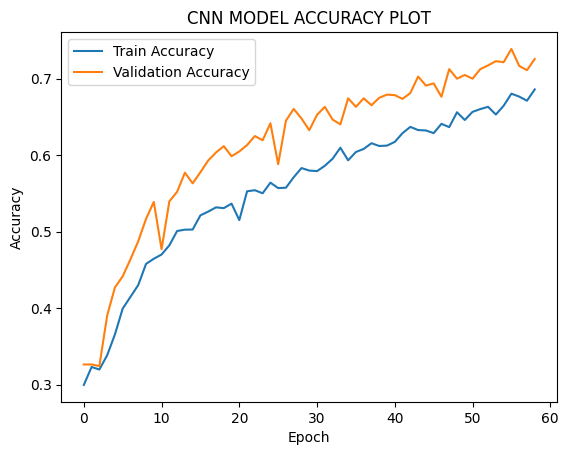

In [134]:
# Plot accuracy
plt.plot(history_k5.history['accuracy'], label='Train Accuracy')
plt.plot(history_k5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN MODEL ACCURACY PLOT')
plt.show()

Convoluted model with 3 convolutional layers & Poolings, using learning rate of 0.001, and batch normalization and l2 regulariser added. **

In [50]:
# Build the model
model_BN_ = Sequential()

# 1st Conv Block
model_BN_.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001),
                 input_shape=(width_npix, height_npix, 3)))
model_BN_.add(BatchNormalization())
model_BN_.add(MaxPooling2D((2, 2)))

# 2nd Conv Block
model_BN_.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model_BN_.add(BatchNormalization())
model_BN_.add(MaxPooling2D((2, 2)))

# 3rd Conv Block
model_BN_.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model_BN_.add(BatchNormalization())
model_BN_.add(MaxPooling2D((2, 2)))

# Flatten + Dense
model_BN_.add(Flatten())
model_BN_.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_BN_.add(BatchNormalization())

# Output Layer
model_BN_.add(Dense(6, activation='softmax'))

Optimizer= Adam(learning_rate=0.001) # Define optimizer and choose learning rate.
model_BN_.compile(
    optimizer=Optimizer,
    loss='categorical_crossentropy',   # since using one-hot encoding
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience = 4) # Define early stopping

# Fit model
history_BN_ = model_BN_.fit(train_generator, epochs = 60, validation_data = val_generator, callbacks=[early_stopping])  

Epoch 1/60
180/180 [==============================] - 254s 1s/step - loss: 1.7448 - accuracy: 0.4523 - val_loss: 2.2701 - val_accuracy: 0.3306
Epoch 2/60
180/180 [==============================] - 256s 1s/step - loss: 1.4752 - accuracy: 0.5243 - val_loss: 1.8923 - val_accuracy: 0.4014
Epoch 3/60
180/180 [==============================] - 256s 1s/step - loss: 1.3707 - accuracy: 0.5507 - val_loss: 1.3548 - val_accuracy: 0.5389
Epoch 4/60
180/180 [==============================] - 242s 1s/step - loss: 1.3210 - accuracy: 0.5670 - val_loss: 1.4633 - val_accuracy: 0.5215
Epoch 5/60
180/180 [==============================] - 237s 1s/step - loss: 1.2951 - accuracy: 0.5823 - val_loss: 1.5710 - val_accuracy: 0.4792
Epoch 6/60
180/180 [==============================] - 231s 1s/step - loss: 1.2541 - accuracy: 0.5995 - val_loss: 1.5754 - val_accuracy: 0.4708
Epoch 7/60
180/180 [==============================] - 233s 1s/step - loss: 1.2630 - accuracy: 0.5969 - val_loss: 1.3350 - val_accuracy: 0.5722

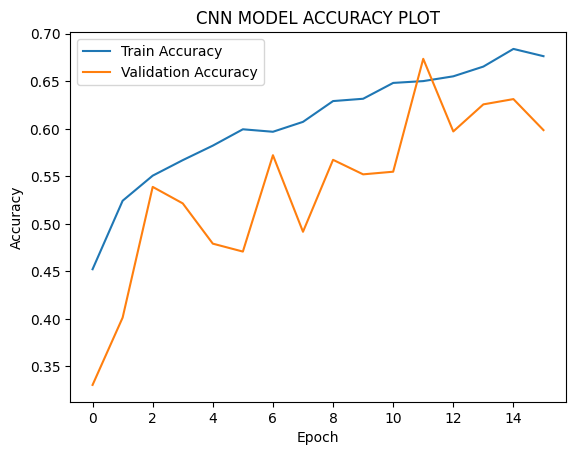

In [135]:
# Plot accuracy
plt.plot(history_BN_.history['accuracy'], label='Train Accuracy')
plt.plot(history_BN_.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN MODEL ACCURACY PLOT')
plt.show()

Convoluted model with 3 convolutional layers & Poolings, using learning rate of 0.001, and stride changed to 2. **

In [62]:
# create model
model_stride_2 = Sequential()

# 1st Conv & Pool
model_stride_2.add(Conv2D(32, (3, 3), strides=2, padding="same", activation='relu', input_shape=(width_npix, height_npix, 3)))
model_stride_2.add(MaxPooling2D(pool_size=(2, 2),padding="same"))

# 2nd Conv & Pool
model_stride_2.add(Conv2D(64, (3, 3), strides=2,padding="same", activation='relu'))
model_stride_2.add(MaxPooling2D(pool_size=(2, 2),padding="same"))

# 3rd Conv & Pool
model_stride_2.add(Conv2D(128, (3, 3), strides=2, padding="same",activation='relu'))
model_stride_2.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

# Flatten, Dense, Dropout
model_stride_2.add(Flatten())
model_stride_2.add(Dense(64, activation='relu'))
model_stride_2.add(Dropout(0.3))



# Add output layer
model_stride_2.add(Dense(6, activation = 'softmax'))

Optimizer= Adam(learning_rate=0.001) # Define optimizer and choose learning rate.
model_stride_2.compile(
    optimizer=Optimizer,
    loss='categorical_crossentropy',   # since using one-hot encoding
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience = 4) # Define early stopping

# Fit model
history_stride_2 = model_stride_2.fit(train_generator, epochs = 60, validation_data = val_generator, callbacks=[early_stopping]) 

Epoch 1/60
180/180 [==============================] - 106s 581ms/step - loss: 1.5597 - accuracy: 0.3191 - val_loss: 1.4548 - val_accuracy: 0.3424
Epoch 2/60
180/180 [==============================] - 95s 527ms/step - loss: 1.4027 - accuracy: 0.3983 - val_loss: 1.3300 - val_accuracy: 0.4354
Epoch 3/60
180/180 [==============================] - 96s 534ms/step - loss: 1.2921 - accuracy: 0.4582 - val_loss: 1.2457 - val_accuracy: 0.4681
Epoch 4/60
180/180 [==============================] - 96s 536ms/step - loss: 1.2444 - accuracy: 0.4727 - val_loss: 1.1715 - val_accuracy: 0.5118
Epoch 5/60
180/180 [==============================] - 99s 553ms/step - loss: 1.1929 - accuracy: 0.4950 - val_loss: 1.2305 - val_accuracy: 0.4674
Epoch 6/60
180/180 [==============================] - 100s 556ms/step - loss: 1.1702 - accuracy: 0.5064 - val_loss: 1.0865 - val_accuracy: 0.5389
Epoch 7/60
180/180 [==============================] - 104s 576ms/step - loss: 1.1266 - accuracy: 0.5231 - val_loss: 1.0736 - val

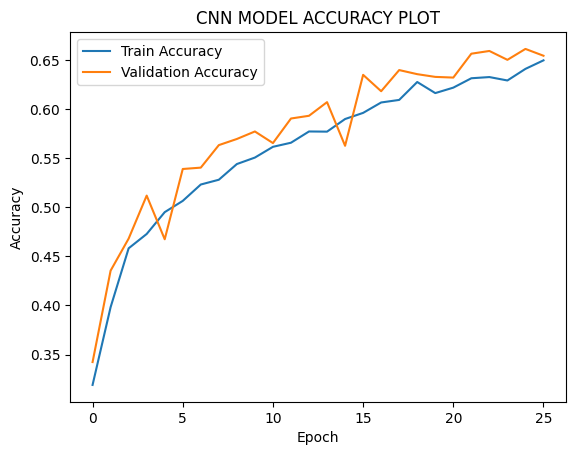

In [136]:
# Plot accuracy
plt.plot(history_stride_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_stride_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN MODEL ACCURACY PLOT')
plt.show()

Subplot showing models with evidence of overfitting

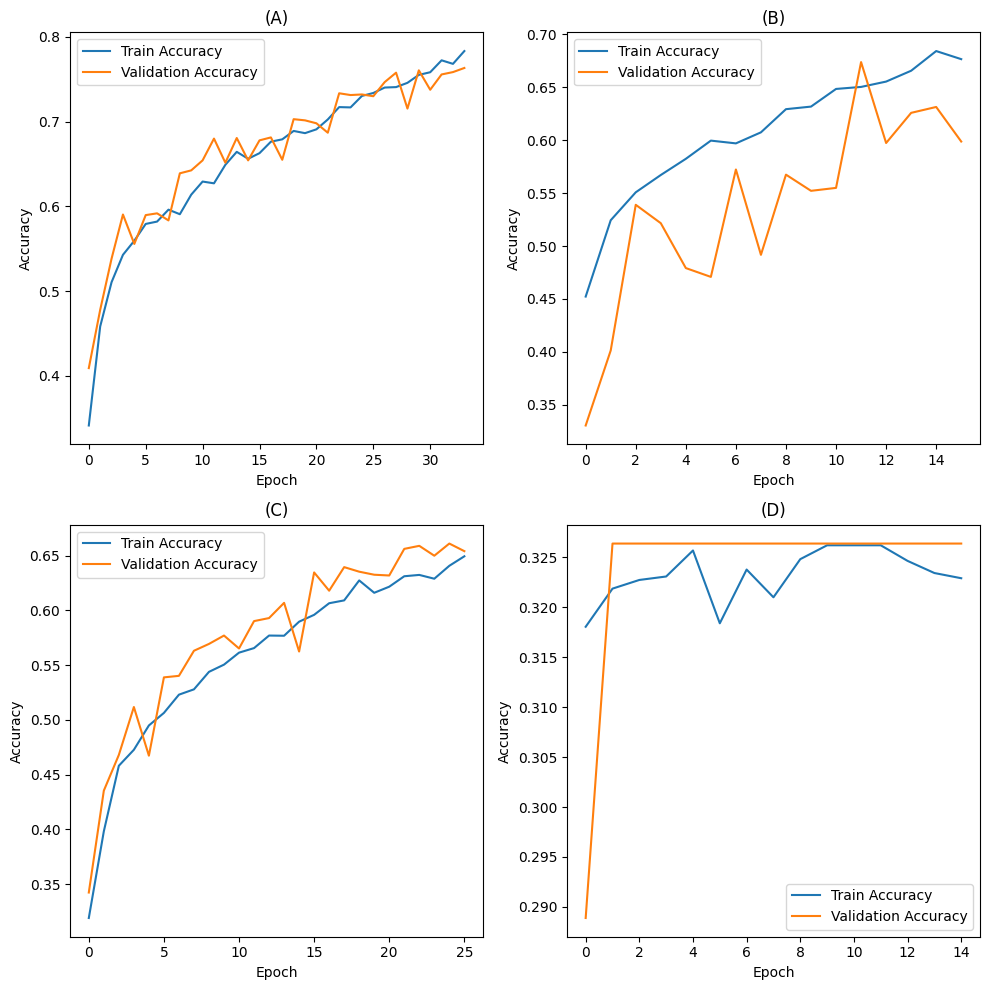

In [145]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot accuracy in each subplot
axs[0, 0].plot(history.history['accuracy'], label='Train Accuracy') # Model without dropout
axs[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()
axs[0, 0].set_title('(A)')

axs[0, 1].plot(history_BN_.history['accuracy'], label='Train Accuracy')   # Model with Batchnormalisation and l2 regulariser
axs[0, 1].plot(history_BN_.history['val_accuracy'], label='Validation Accuracy')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()
axs[0, 1].set_title('(B)')

axs[1, 0].plot(history_stride_2.history['accuracy'], label='Train Accuracy')            # Model with stride
axs[1, 0].plot(history_stride_2.history['val_accuracy'], label='Validation Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()
axs[1, 0].set_title('(C)')

axs[1, 1].plot(history_LR001_Drop30.history['accuracy'], label='Train Accuracy')         # Model with learning rate of 0.01
axs[1, 1].plot(history_LR001_Drop30.history['val_accuracy'], label='Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()
axs[1, 1].set_title('(D)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

